<a href="https://colab.research.google.com/github/chaithralava/data-anytics-projects/blob/main/Lavanya_J_minor_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Missing values in each column:
 id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   id                    381109 non-null  int64 
 1   Gender                381109 non-null  object
 2   Age                   381109 non-null  int64 
 3   Driving_License       381109 non-null  int64 
 4   Region_Code           381109 non-null  int64 
 5   Previously_Insured    381109 non-null  int64 
 6   Vehicle_Age           381109 non-null  object
 7   Vehicle_Damage        381109 non-null  object
 8   Annual_Premium   

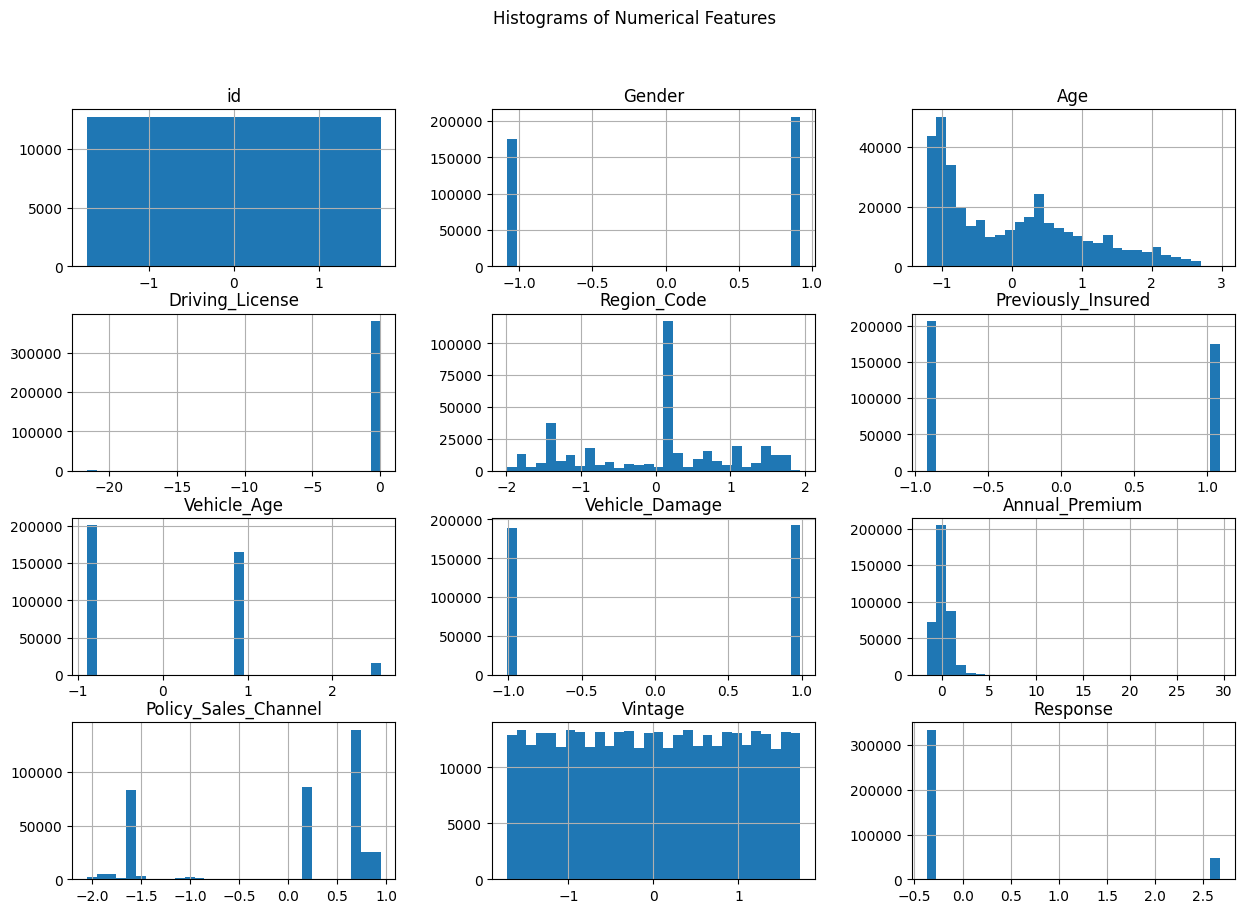

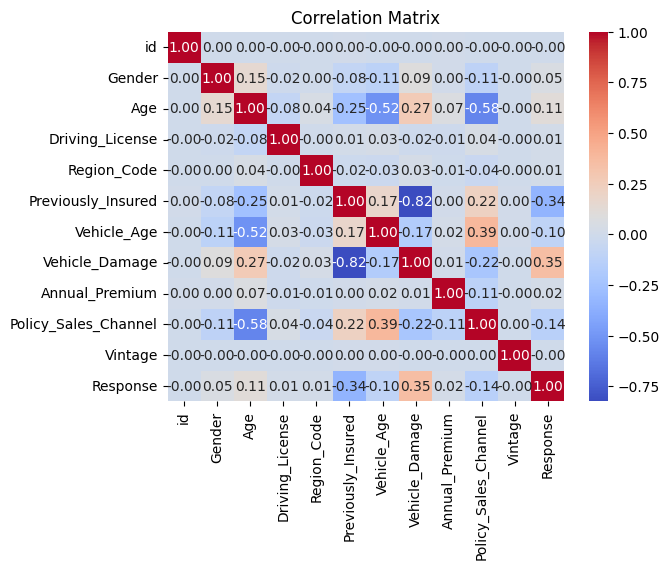

LogisticRegression()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve

# Load dataset
df = pd.read_csv('/content/Data Analytics minor project-Vehical insurance prediction 1111 (1).csv')  # Assuming you load your dataset here

# Check for missing values
print("Missing values in each column:\n", df.isnull().sum())

# Basic EDA
print("DataFrame info:\n", df.info())
print("Descriptive Statistics:\n", df.describe())

# Check the distribution of 'Response' variable
print("Response variable distribution before filtering:\n", df['Response'].value_counts())

# Ensure the target variable is binary
df = df[df['Response'].isin([0, 1])]

# Check if there are samples left after filtering
if df.shape[0] == 0:
    raise ValueError("No samples left after filtering for binary 'Response'. Check the 'Response' column values.")

# Check the unique values in the target variable
print("Unique values in 'Response' after filtering:", df['Response'].unique())
print("Response variable distribution after filtering:\n", df['Response'].value_counts())

# Feature Engineering: Encode categorical variables
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

# Standardize numerical features
scaler = StandardScaler()
numerical_cols = df.select_dtypes(include=[np.number]).columns
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Visualize distributions of numerical features
df[numerical_cols].hist(bins=30, figsize=(15, 10))
plt.suptitle('Histograms of Numerical Features')
plt.show()

# Check correlation matrix
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Convert the target variable to integer type
y = df['Response'].astype(int)

# Split the data into features (X) and target (y)
X = df.drop(['id', 'Response'], axis=1)

# Further split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Using Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)
